## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [13]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [14]:
columns_to_select = ["City Name", "Package", "Variety", "Origin", "Item Size", "Color"]
pumpkins = full_pumpkins.loc[:, columns_to_select]
pumpkins.dropna(inplace=True)

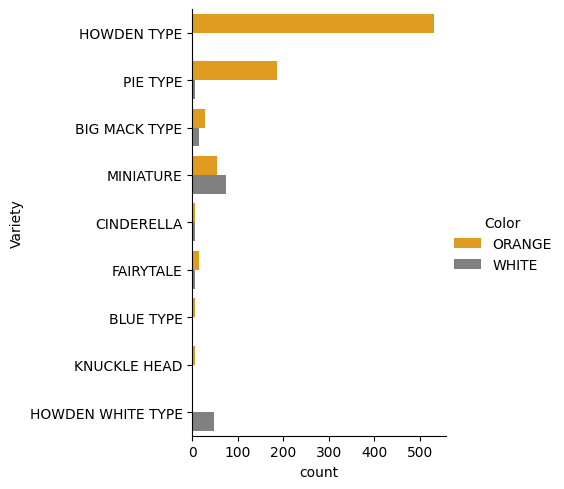

In [16]:
import seaborn as sb

palette = ["orange", "grey"]

sb.catplot(data=pumpkins, y="Variety", hue="Color", kind="count", palette=palette)

### Ordinal Encoder for ordinal features of the dataset

In [21]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [pumpkins["Item Size"].unique()]
ordinal_features = ["Item Size"]
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

### Categorical Encoder for categorical features of the dataset

In [22]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["City Name", "Package", "Variety", "Origin"]
categorical_encoder = OneHotEncoder(sparse_output=False)

### Apply Column Transformer to combine the Ordinal and Categorical Encoders in the Data Frame

In [24]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("ord", ordinal_encoder, ordinal_features), ("cat", categorical_encoder, categorical_features)])
ct.set_output(transform="pandas")
encoded_features = ct.fit_transform(pumpkins)

### Label Encoder to encode the Color

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins["Color"])

### Merge results into new Data Frame

In [ ]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)

### Visualizing relationships in the data

In [ ]:
palette = ["orange", "wheat"]

pumpkins["Item Size"] = encoded_pumpkins["ord__Item Size"]

g = 